# EDA: Lung Cancer Prediction
**Machine learning project**

Ana Sousa Gerós
April 2025

# 1 - Initial setup

In [15]:
# general library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
colors=['#011f4b','#03396c','#005b96','#6497b1','#b3cde0']
sns.set_palette(sns.color_palette(colors))
# random seed generators
from numpy.random import seed
seed(888)

In [19]:
# import dataset
df = pd.read_csv("../data/survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# 2 - Dataset Overview and Light Preprocessing

In [31]:
# understanding the dataset: shape
print(df.shape)

(309, 16)


In [33]:
# understanding the dataset: features
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [37]:
# understanding the dataset: stats on numerical features
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000




#### QA and preprocessing of the dataset:

In [47]:
#Check for null values: none
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [76]:
#Check for duplicated values
df.duplicated().sm()

AttributeError: 'Series' object has no attribute 'sm'

In [51]:
#Drop duplicated rows
df.drop_duplicates(inplace=True)

In [64]:
#Feature enginering: transform gender and cancer predictions into biinary outputs
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['LUNG_CANCER']=encoder.fit_transform(df['LUNG_CANCER'])
df['GENDER']=encoder.fit_transform(df['GENDER'])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [66]:
# check reshaped dataset
df.shape
df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,0.514493,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971,0.862319
std,0.500698,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530,0.345191
min,0.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,1.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


### General Observations:

GENDER - Quite balanced dataset, slightly more male than female individuals (inferring from the mean, which would be 0.5 if the numbers were exactly the same).

AGE - The sampled population consists mostly of elderly people (mean and median around 63 yo). A few younger individuals (min= 21 yo) are also present.

SMOKING - More non-smokers than smokers (inferring from the mean, which would be 1.5 if the numbers were exactly the same).

YELLOW_FINGERS -  More individuals with yellow fingers than regular.

ANXIETY - The dataset seems quite balanced in this feature, a couple more individuals presenting with no anxiety.

PEER_PRESSURE - The dataset seems quite balanced in this feature.

CHRONIC_DISEASE - The dataset seems quite balanced in this feature,, a few more individuals with chronic disease.

FATIGUE - More individuals showing signs of fatigue than no fatigue.

ALLERGY - The dataset seems quite balanced in this feature, a couple more individuals presenting with no allergies.

WHEEZING - The dataset seems quite balanced in this feature, a couple more individuals presenting with no wheezing.

ALCOHOL CONSUMING - More individuals consuming alcohol than no alcohol consumption.

COUGHING - More individuals presenting with coughing symptoms than no cough.

SHORTNESS OF BREATH - More individuals presenting with shortness of breath than regular breathing capacity.

SWALLOWING DIFFICULTY - Most individuals do not report swallowing difficulties.

CHEST PAIN - More individuals presenting with chest pain than no pain.

LUNG_CANCER - Most individuals present with lung cancer.

# 3 - Exploratory Data Analysis (EDA):

In [86]:
#discriminate between continuous and categorical columns
continuous_cols = ['AGE']

categorical_cols=[]
for i in df.columns:
    if i!='AGE':
        categorical_cols.append(i)

In [90]:
# ignore warnings from deprecated functions
import warnings
warnings.filterwarnings('ignore')

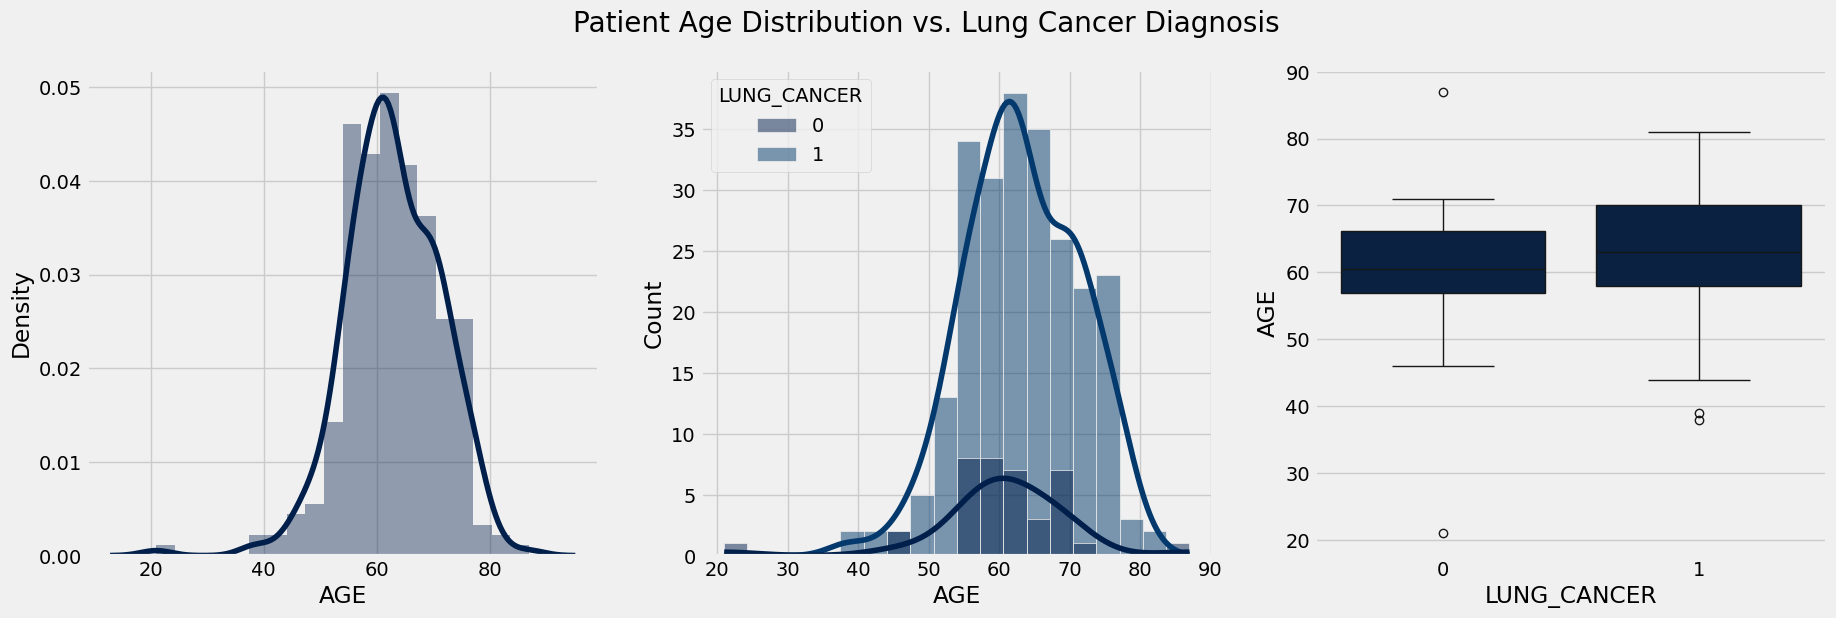

In [110]:
# Plot continuous variable distribution (age) - By itself and correlated with lung cancer
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.distplot(df['AGE'],ax=ax[0])
sns.histplot(data =df,x='AGE',ax=ax[1],hue='LUNG_CANCER',kde=True)
sns.boxplot(x=df['LUNG_CANCER'],y=df['AGE'],ax=ax[2])
plt.suptitle("Patient Age Distribution vs. Lung Cancer Diagnosis",size=20)
plt.show()

#### Observations:

A couple of <mark>outliers</mark> can be seen in the box-plot.

Now, for simplicity, let's change values 2 (yes), 1 (no) to 1 (yes), 0 (no).

In [160]:
for i in df.columns[2:-1]:
    temp=[]
    for j in df[i]:
        temp.append(j-1)
    df[i]=temp
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


Text(0.5, 0.98, 'Categorical Features: Absolute Numbers vs. Lung Cancer Diagnosis')

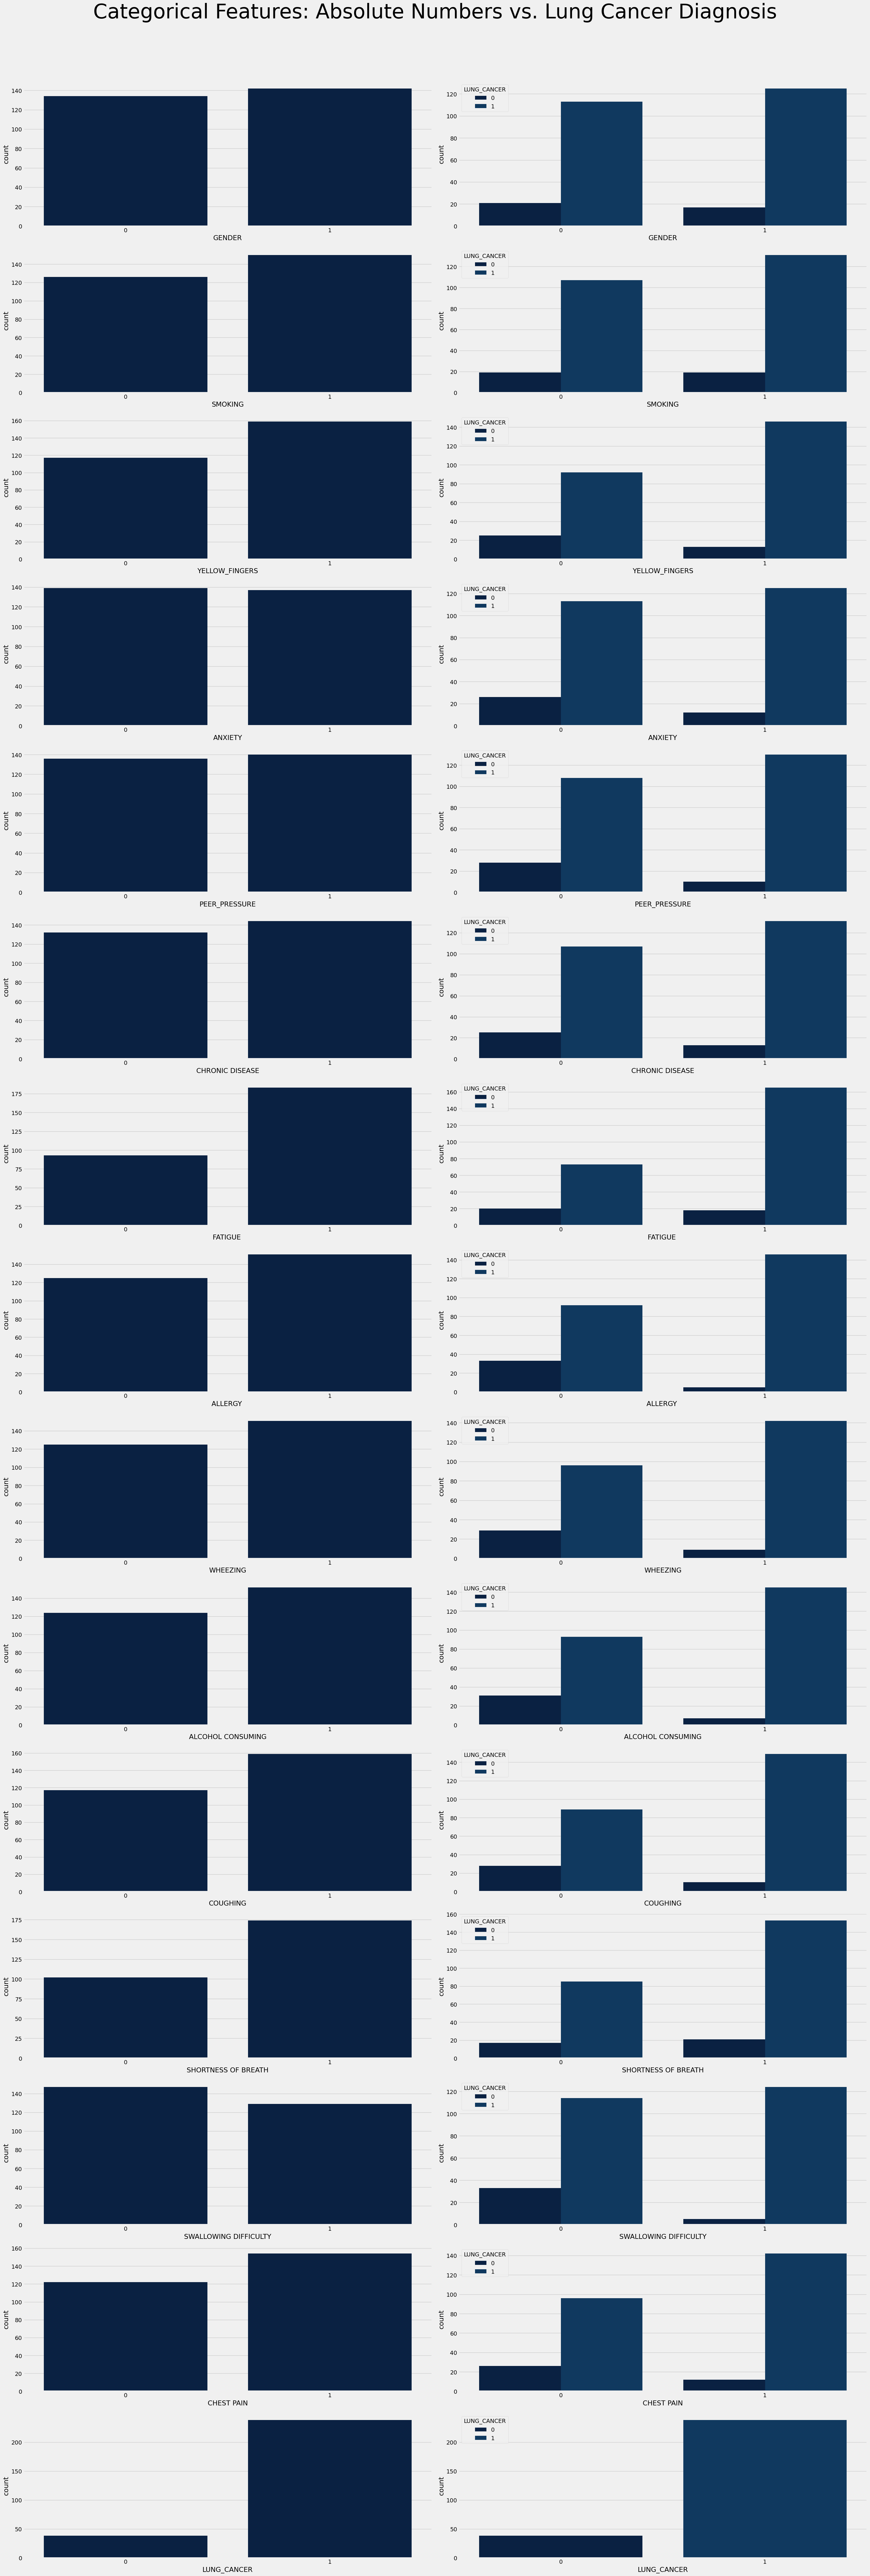

In [162]:
fig,ax = plt.subplots(15,2,figsize=(30,90))
for index,i in enumerate(categorical_cols):
    sns.countplot(data=df,x=i,ax=ax[index,0])
    sns.countplot(data=df,x=i,ax=ax[index,1],hue='LUNG_CANCER')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Categorical Features: Absolute Numbers vs. Lung Cancer Diagnosis",fontsize=50)

#### Observations:

The dataset is highly <mark>imbalanced</mark>, as most individuals present with lung cancer.

Text(0.5, 0.98, 'Continuous Features (AGE) vs. Categorical Features')

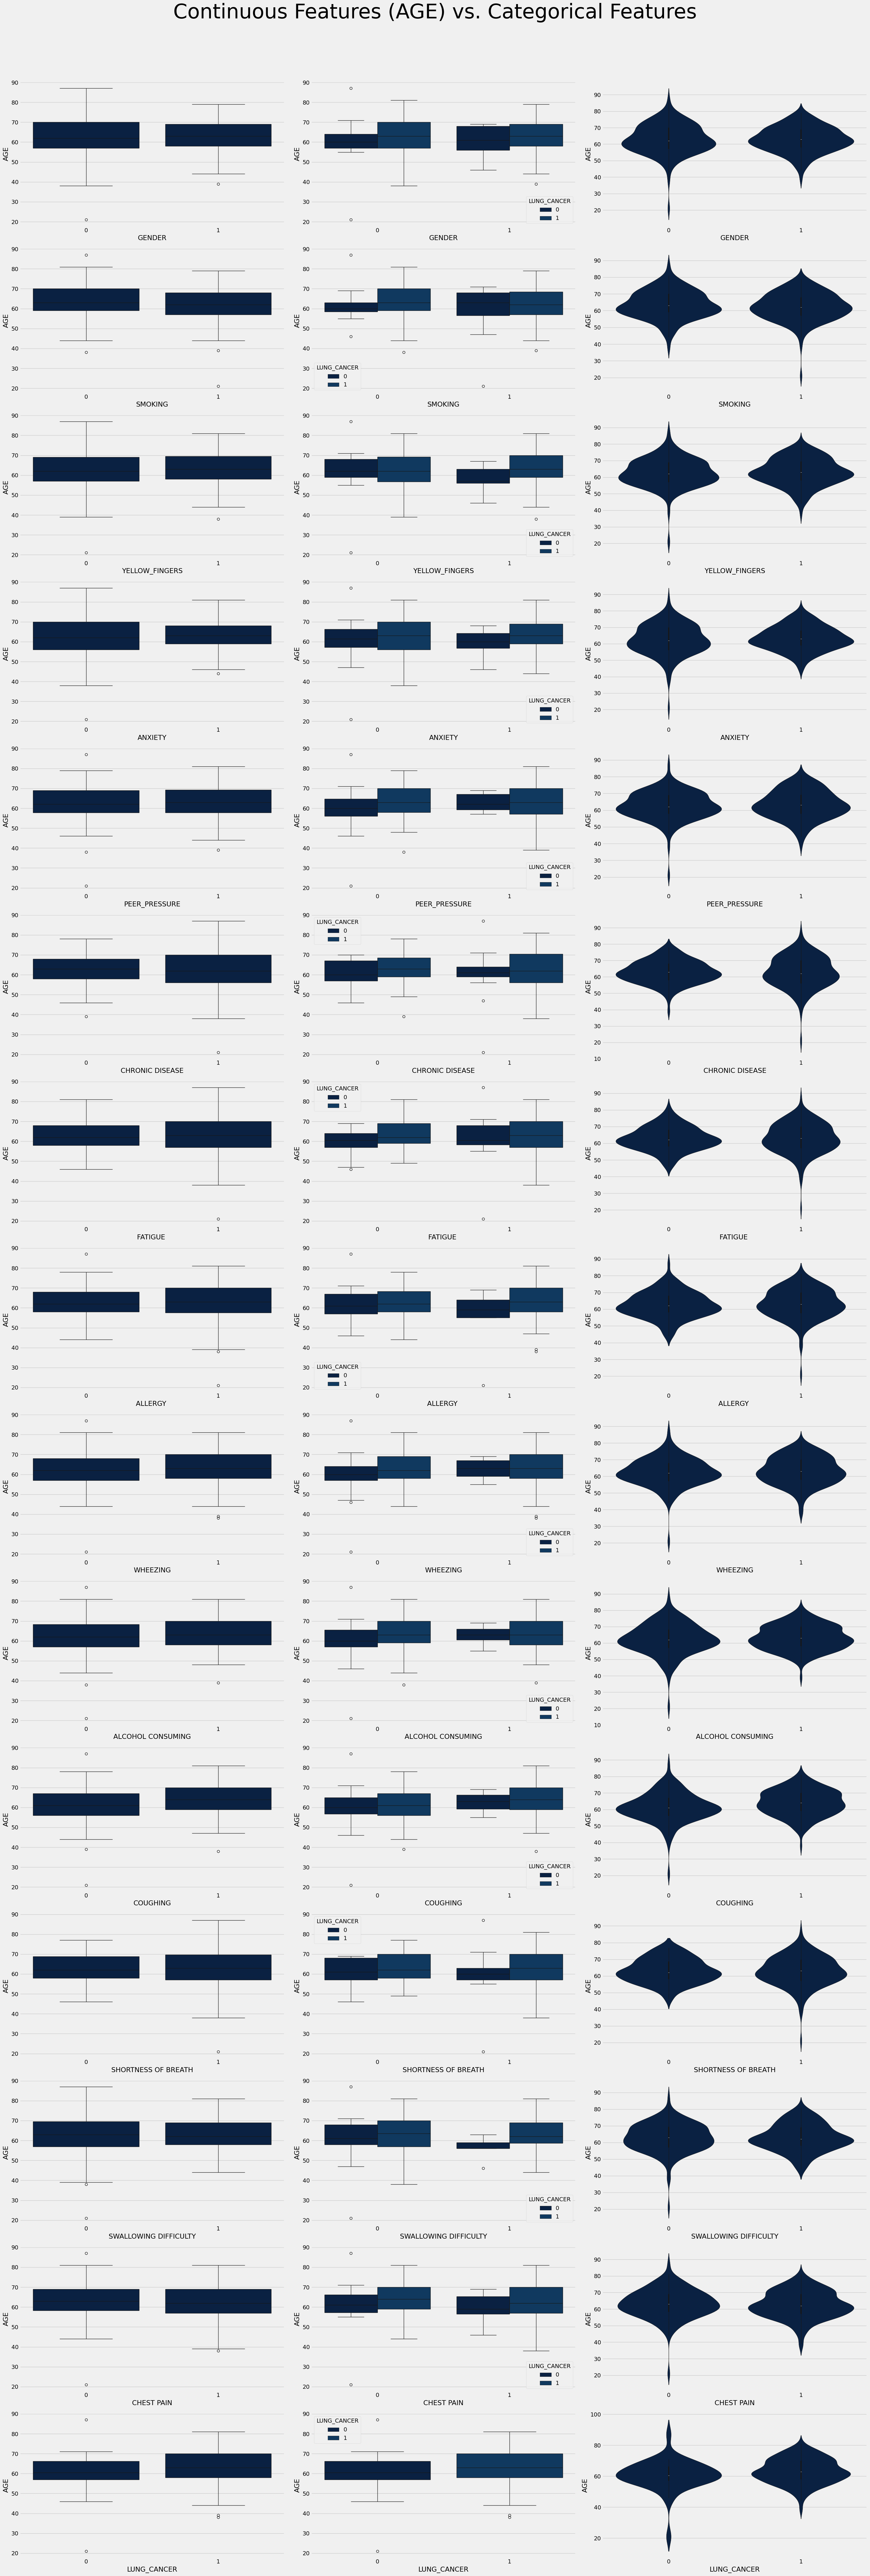

In [164]:
fig,ax = plt.subplots(15,3,figsize=(30,90))
for index,i in enumerate(categorical_cols):
    sns.boxplot(x=df[i],y=df['AGE'],ax=ax[index,0])
    sns.boxplot(x=df[i],y=df['AGE'],ax=ax[index,1],hue=df['LUNG_CANCER'])
    sns.violinplot(x=df[i],y=df['AGE'],ax=ax[index,2])
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Continuous Features (AGE) vs. Categorical Features",fontsize=50)

<Axes: >

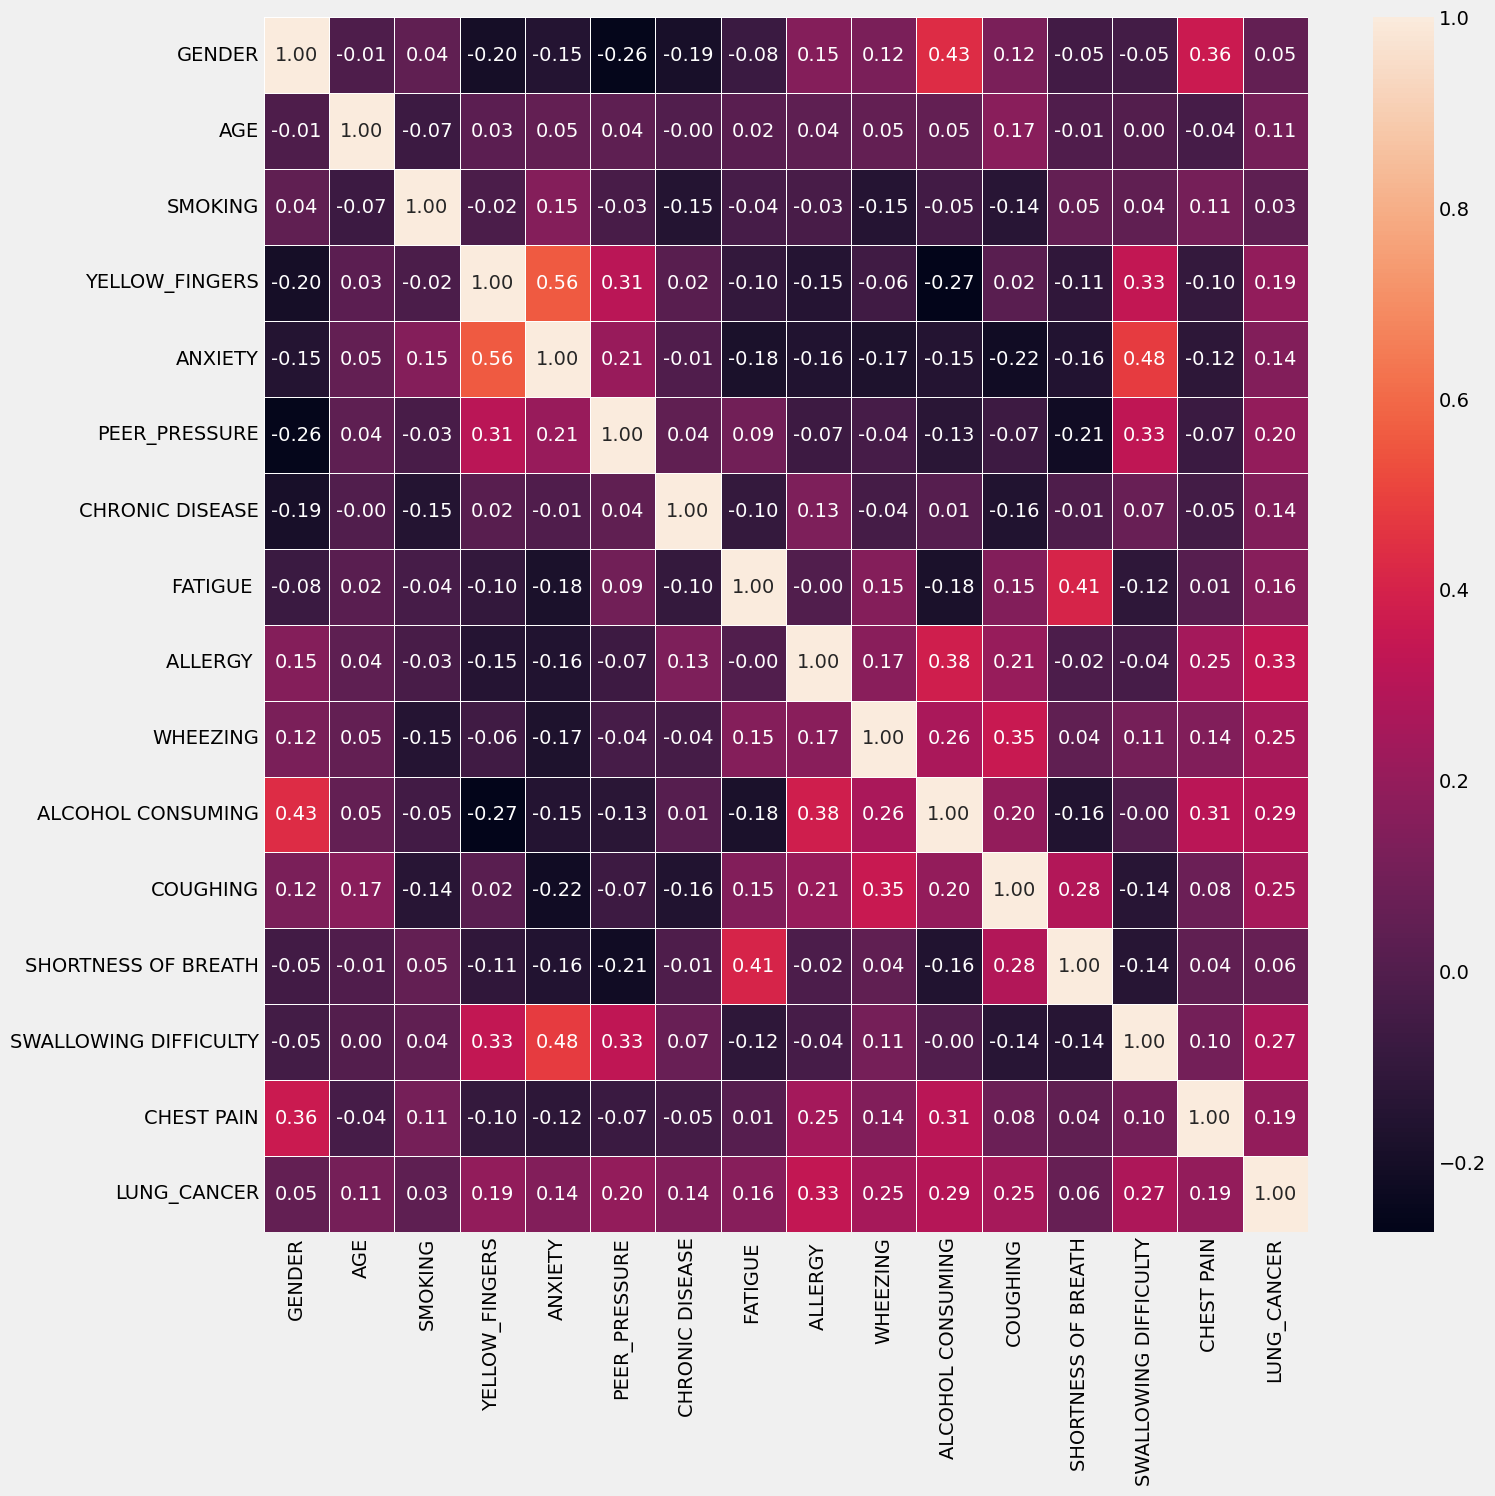

In [130]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='0.2f')

#### Observations:

The data shows <mark>multicolinearity<mark/>.

# 4 - Data Preprocessing

First let's separate input features from labels.

In [171]:
X=df.drop(['LUNG_CANCER'],axis=0)
y=df['LUNG_CANCER']

Now, since the dataset is highly imbalanced, let's oversample the minority class.

In [181]:
from imblearn.over_sampling import RandomOverSampler
X_over,y_over=RandomOverSampler().fit_resample(X,y)

In [201]:
# Confirm the dataset is balanced
y.describe(), y_over.describe()

(count    276.000000
 mean       0.862319
 std        0.345191
 min        0.000000
 25%        1.000000
 50%        1.000000
 75%        1.000000
 max        1.000000
 Name: LUNG_CANCER, dtype: float64,
 count    476.000000
 mean       0.500000
 std        0.500526
 min        0.000000
 25%        0.000000
 50%        0.500000
 75%        1.000000
 max        1.000000
 Name: LUNG_CANCER, dtype: float64)

Let's now split the dataset into <mark>train<mark/>, <mark>validate<mark/> and <mark>test<mark/> subsets.

In [207]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42, stratify=y_over) # 1 - 0.2= 0.8
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train) # 0.8 - 0.25 x 0.8 = 0.6

print(f'Train shape : {X_train.shape}\nValidate shape: {X_val.shape}\nTest shape: {X_test.shape}')

Train shape : (285, 15)
Validate shape: (95, 15)
Test shape: (96, 15)


Now let's scale the continuous variable (age) data.

In [210]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train['AGE']=scaler.fit_transform(X_train[['AGE']])
X_val['AGE']=scaler.fit_transform(X_val[['AGE']])
X_test['AGE']=scaler.transform(X_test[['AGE']])

X_train.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
310,0,-0.255232,2,1,1,1,2,2,2,1,1,1,2,1,1
164,1,0.070961,1,1,1,1,2,1,2,1,2,2,2,2,2
114,1,-0.472695,2,1,1,1,1,2,1,2,2,2,2,1,2
220,0,0.940811,1,2,1,2,2,2,2,1,2,2,1,1,1
339,0,0.179693,1,1,1,1,2,2,1,1,1,1,2,1,1


# 5 - Build the Machine Learning Model

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:pink;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:black;"><b> Model Evaluation Metric: Recall</b></p>
</div>

# $Recall = \frac{True Positives}{(True Positives + False Negatives)}$ <br>

Recall is a good metric to evaluate model performance in this specific dataset because the priority is to reduce False Negative misclassifications (i.e. patients with lung cancer classified as cancer-free).

#### A. k-Nearest Neighbours (KNN) Classifier

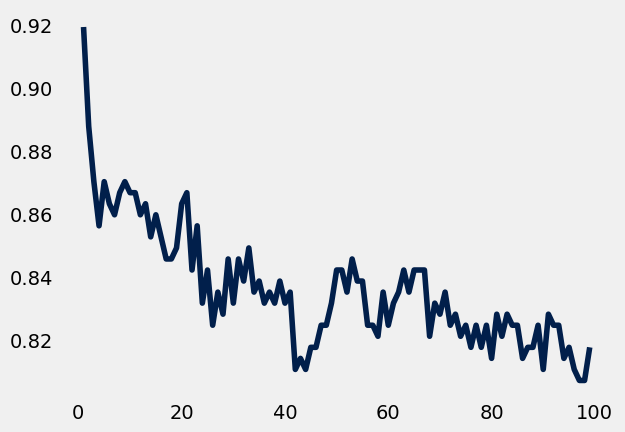

In [257]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

knn_scores=[]
for k in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x=list(range(1, 101))

plt.plot([k for k in range(1,100)],knn_scores)
plt.grid()

In [259]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

Text(34.58333333333333, 0.5, 'Actual')

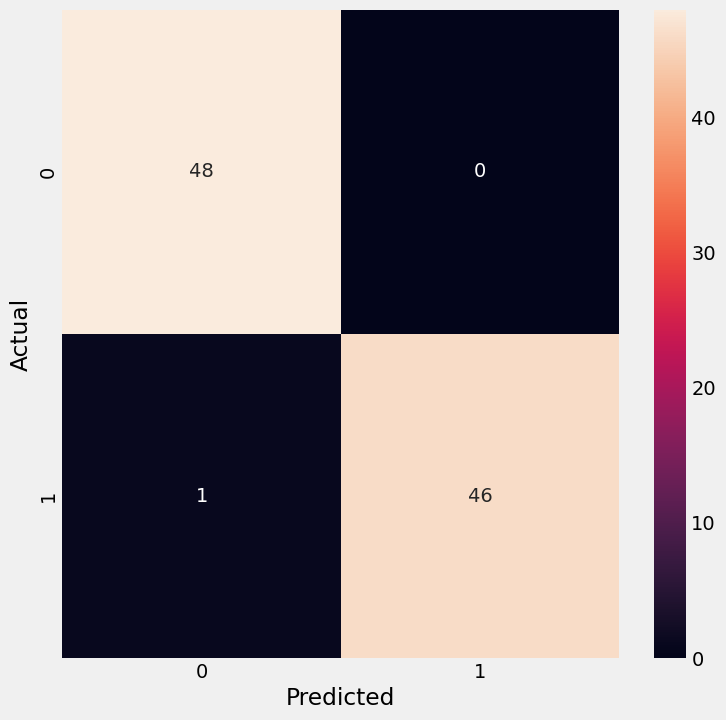

In [261]:
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_val,knn.predict(X_val))

plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [263]:
from sklearn.metrics import classification_report
print(classification_report(y_val,knn.predict(X_val)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.98      0.99        47

    accuracy                           0.99        95
   macro avg       0.99      0.99      0.99        95
weighted avg       0.99      0.99      0.99        95



In [265]:
print(classification_report(y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        48
           1       1.00      0.94      0.97        48

    accuracy                           0.97        96
   macro avg       0.97      0.97      0.97        96
weighted avg       0.97      0.97      0.97        96



#### B. Support Vector Machines (SVM)

In [268]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'gamma': [0.001, 0.01, 0.1, 1, 10,
                                                  100]})

Text(34.58333333333333, 0.5, 'Actual')

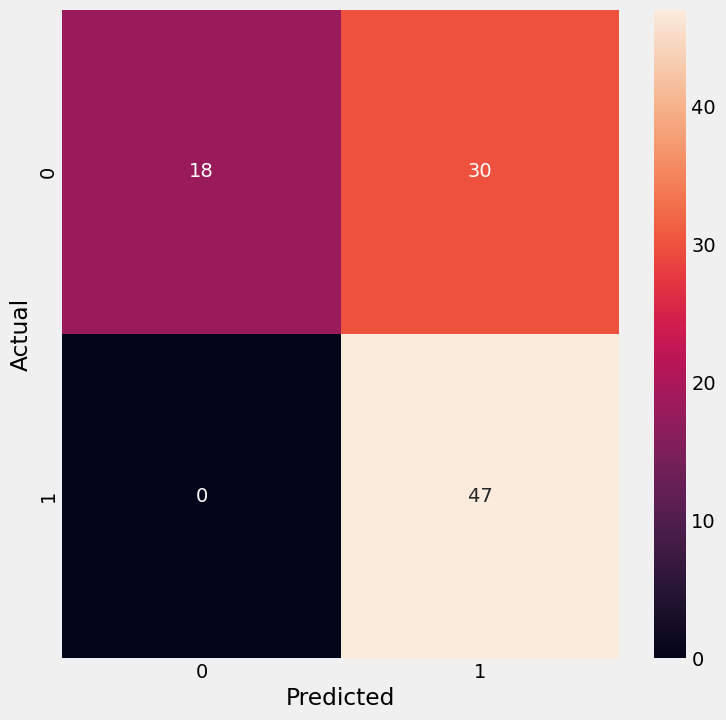

In [272]:
y_pred_svc=rcv.predict(X_val)
confusion_svc=confusion_matrix(y_val,rcv.predict(X_val))

plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [274]:
print(classification_report(y_val,y_pred_svc))
print(f'\nBest Parameters of SVC model is : {rcv.best_params_}\n')

              precision    recall  f1-score   support

           0       1.00      0.38      0.55        48
           1       0.61      1.00      0.76        47

    accuracy                           0.68        95
   macro avg       0.81      0.69      0.65        95
weighted avg       0.81      0.68      0.65        95


Best Parameters of SVC model is : {'gamma': 100, 'C': 1}



In [277]:
y_pred_test_svc=rcv.predict(X_test)

print(classification_report(y_test,y_pred_test_svc))
print(f'\nBest Parameters of SVC model is : {rcv.best_params_}\n')

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        48
           1       0.63      1.00      0.77        48

    accuracy                           0.71        96
   macro avg       0.82      0.71      0.68        96
weighted avg       0.82      0.71      0.68        96


Best Parameters of SVC model is : {'gamma': 100, 'C': 1}



#### C. Logistic Regression

In [279]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[50,75,100,200,300,400,500,700]}

log=RandomizedSearchCV(LogisticRegression(solver='lbfgs'),param_grid,cv=5)
log.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'max_iter': [50, 75, 100, 200, 300, 400,
                                                     500, 700]})

Text(34.58333333333333, 0.5, 'Actual')

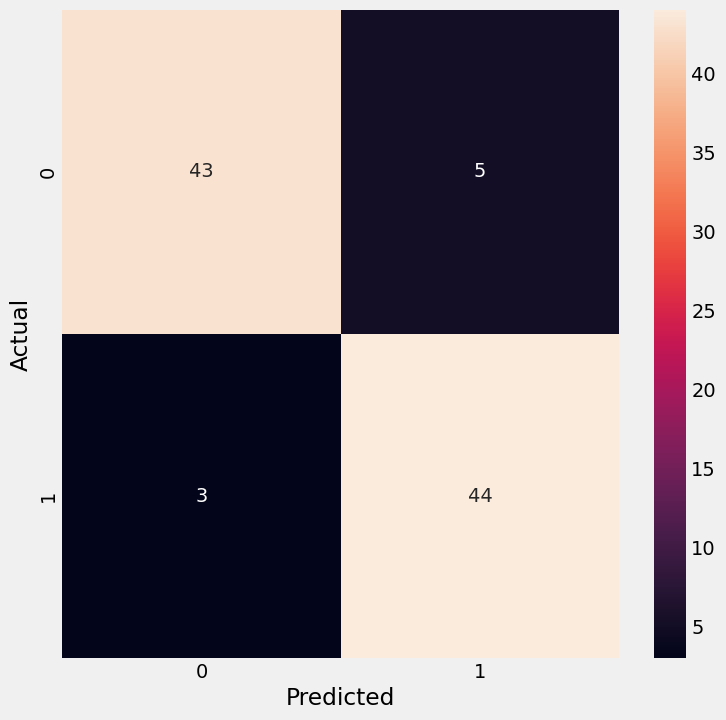

In [283]:
y_pred_log=log.predict(X_val)
confusion_log=confusion_matrix(y_val,log.predict(X_val))

plt.figure(figsize=(8,8))
sns.heatmap(confusion_log,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [285]:
print(classification_report(y_val,y_pred_log))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        48
           1       0.90      0.94      0.92        47

    accuracy                           0.92        95
   macro avg       0.92      0.92      0.92        95
weighted avg       0.92      0.92      0.92        95



In [287]:
y_pred_test_log=log.predict(X_test)
print(classification_report(y_test,y_pred_test_log))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        48
           1       0.95      0.88      0.91        48

    accuracy                           0.92        96
   macro avg       0.92      0.92      0.92        96
weighted avg       0.92      0.92      0.92        96



#### D. Random Forest Classifier 

In [290]:
param_grid = {
'n_estimators': [50, 75,100, 150, 200,300],
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'n_estimators': [50, 75, 100, 150, 200,
                                                         300]})

Text(34.58333333333333, 0.5, 'Actual')

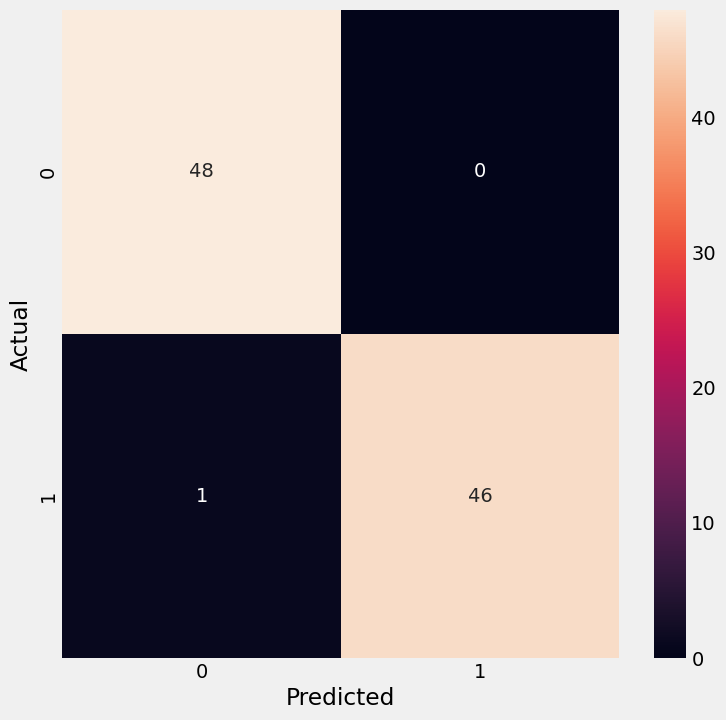

In [292]:
y_pred_rcv=rcv.predict(X_val)
confusion_rcv=confusion_matrix(y_val,rcv.predict(X_val))

plt.figure(figsize=(8,8))
sns.heatmap(confusion_rcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [294]:
print(classification_report(y_val,y_pred_rcv))
print(f'\nBest Parameter: {rcv.best_params_}\n')

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.98      0.99        47

    accuracy                           0.99        95
   macro avg       0.99      0.99      0.99        95
weighted avg       0.99      0.99      0.99        95


Best Parameter: {'n_estimators': 75}



In [298]:
y_pred_test_rcv=rcv.predict(X_test)
print(classification_report(y_test,y_pred_test_rcv))
print(f'\nBest Parameter: {rcv.best_params_}\n')

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        48
           1       1.00      0.94      0.97        48

    accuracy                           0.97        96
   macro avg       0.97      0.97      0.97        96
weighted avg       0.97      0.97      0.97        96


Best Parameter: {'n_estimators': 75}



#### E. Gradient Boosting Classifier

In [301]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators': [50, 75,100, 150, 200,300],
}

gbc=RandomizedSearchCV(GradientBoostingClassifier(random_state=42),param_grid,cv=5)
gbc.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'learning_rate': [0.05, 0.075, 0.1,
                                                          0.25, 0.5, 0.75, 1],
                                        'n_estimators': [50, 75, 100, 150, 200,
                                                         300]})

Text(34.58333333333333, 0.5, 'Actual')

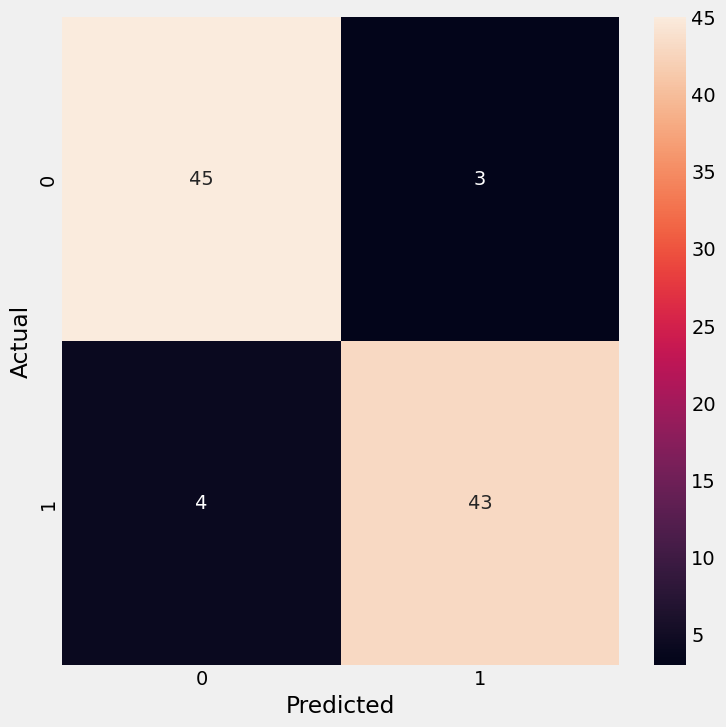

In [303]:
y_pred_gbc=gbc.predict(X_val)
confusion_gbc=confusion_matrix(y_val,y_pred_gbc)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_gbc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [305]:
print(classification_report(y_val,y_pred_gbc))
print(f'\nBest Parameter: {gbc.best_params_}\n')

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        48
           1       0.93      0.91      0.92        47

    accuracy                           0.93        95
   macro avg       0.93      0.93      0.93        95
weighted avg       0.93      0.93      0.93        95


Best Parameter: {'n_estimators': 150, 'learning_rate': 0.5}



In [307]:
y_pred_test_gbc=gbc.predict(X_test)
print(classification_report(y_test,y_pred_test_gbc))
print(f'\nBest Parameter: {gbc.best_params_}\n')

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        48
           1       0.88      0.92      0.90        48

    accuracy                           0.90        96
   macro avg       0.90      0.90      0.90        96
weighted avg       0.90      0.90      0.90        96


Best Parameter: {'n_estimators': 150, 'learning_rate': 0.5}



#### F. LGBM Classifier

In [312]:
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.2 MB/s eta 0:00:0000:0100:01
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 143, number of negative: 142
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 73
[LightGBM] [Info] Number of data points in the train set: 285, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501754 -> initscore=0.007018
[LightGBM] [Info] Start training from score 0.007018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

LGBMClassifier()

Text(34.58333333333333, 0.5, 'Actual')

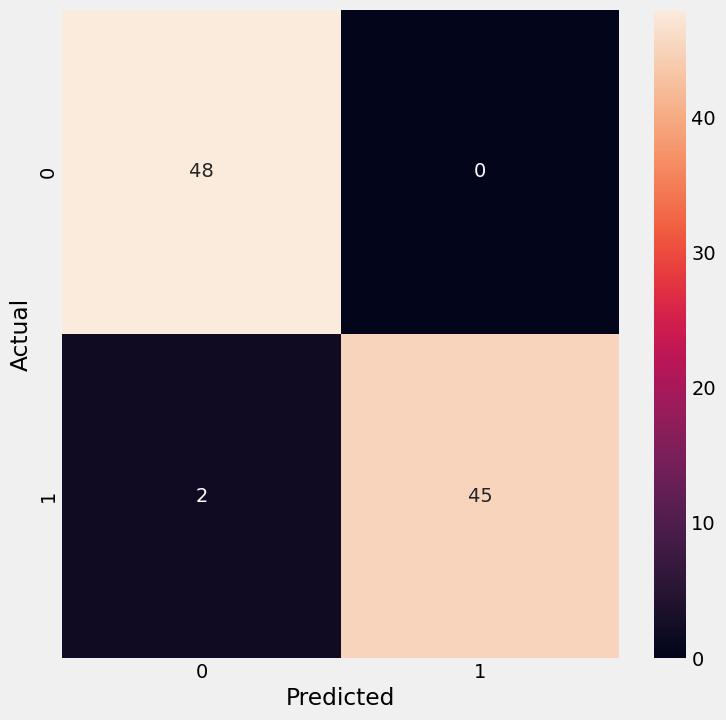

In [314]:
y_pred=model.predict(X_val)
confusion=confusion_matrix(y_val,y_pred)

plt.figure(figsize=(8,8))
sns.heatmap(confusion,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [316]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.96      0.98        47

    accuracy                           0.98        95
   macro avg       0.98      0.98      0.98        95
weighted avg       0.98      0.98      0.98        95



In [318]:
y_pred_test=model.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        48
           1       1.00      0.90      0.95        48

    accuracy                           0.95        96
   macro avg       0.95      0.95      0.95        96
weighted avg       0.95      0.95      0.95        96



### Choosing the best model

Based on performance on the validation subset, both KNN and RFC show great results:

### Checking model training metrics

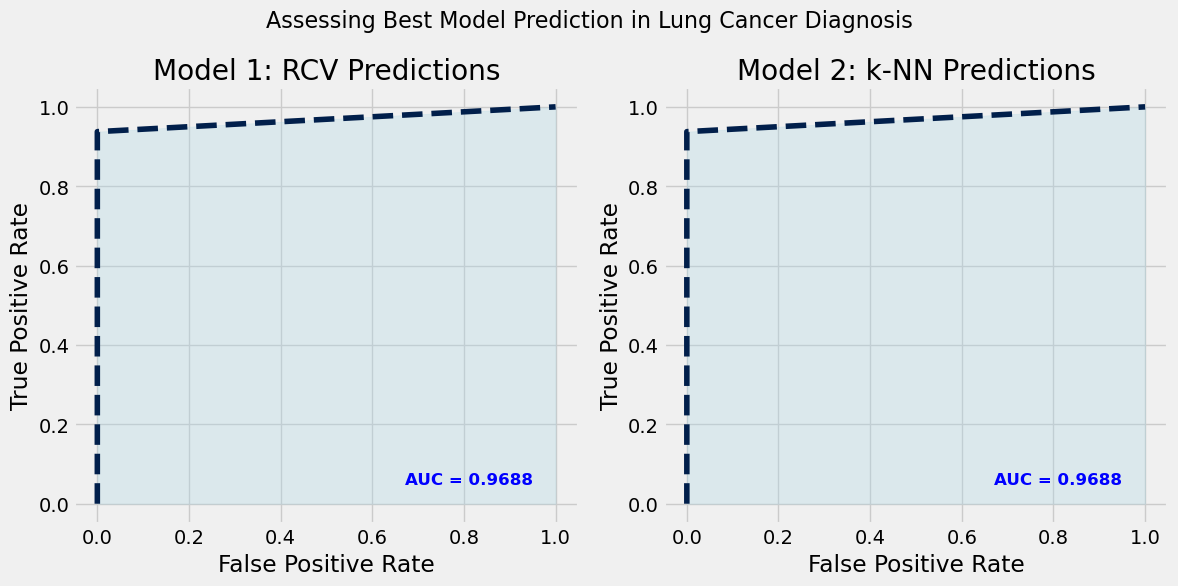

In [330]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=100)

# ROC curve for model 1 (e.g., logistic regression with RCV)
auc1 = metrics.roc_auc_score(y_test, y_pred_test_rcv)
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred_test_rcv)

ax[0].plot(fpr1, tpr1, '--', label='ROC Curve')
ax[0].fill_between(fpr1, tpr1, alpha=0.3, color='lightblue')
ax[0].text(0.95, 0.05, f'AUC = {auc1:.4f}', ha='right', fontsize=12, weight='bold', color='blue')
ax[0].set_title('Model 1: RCV Predictions')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')

# ROC curve for model 2 (e.g., k-NN)
y_pred_knn = knn.predict_proba(X_test)[:, 1]  # Get probabilities for ROC
auc2 = metrics.roc_auc_score(y_test, y_pred_knn)
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred_knn)

ax[1].plot(fpr2, tpr2, '--', label='ROC Curve')
ax[1].fill_between(fpr2, tpr2, alpha=0.3, color='lightblue')
ax[1].text(0.95, 0.05, f'AUC = {auc2:.4f}', ha='right', fontsize=12, weight='bold', color='blue')
ax[1].set_title('Model 2: k-NN Predictions')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')

fig.tight_layout()
fig.subplots_adjust(top=0.85)
fig.suptitle("Assessing Best Model Prediction in Lung Cancer Diagnosis", fontsize=16)

plt.show()

Trying a slightly different splitting ratio, to assess the robustness of each model to variations in train/validade/test subsets:

In [358]:
# Try a different splitting ratio
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_over, y_over, test_size=0.3, random_state=42, stratify=y_over) # 1 - 0.3= 0.7
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2, y_train2, test_size=0.3, random_state=42, stratify=y_train2) # 0.7 - 0.3 x 0.7 = 0.42

print(f'Train shape : {X_train2.shape}\nValidate shape: {X_val2.shape}\nTest shape: {X_test2.shape}')

Train shape : (233, 15)
Validate shape: (100, 15)
Test shape: (143, 15)


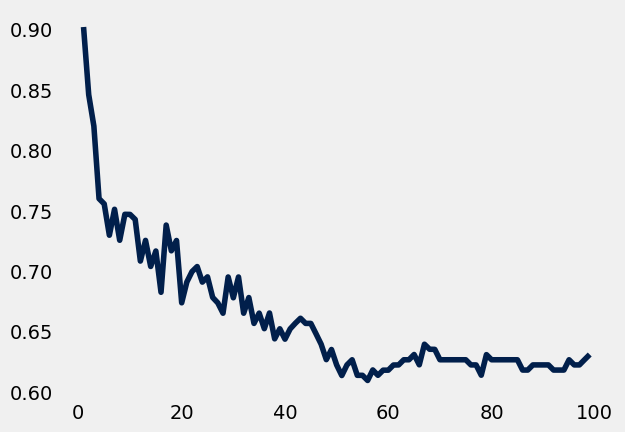

In [360]:
knn_scores=[]
for k in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train2,y_train2,cv=5)
    knn_scores.append(scores.mean())

x=list(range(1, 101))

plt.plot([k for k in range(1,100)],knn_scores)
plt.grid()

In [362]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train2,y_train2)
print(classification_report(y_val2,knn.predict(X_val2)))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        50
           1       0.94      0.98      0.96        50

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [364]:
print(classification_report(y_test2,knn.predict(X_test2)))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        72
           1       0.90      0.79      0.84        71

    accuracy                           0.85       143
   macro avg       0.86      0.85      0.85       143
weighted avg       0.86      0.85      0.85       143



In [366]:
param_grid = {
'n_estimators': [50, 75,100, 150, 200,300],
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train2,y_train2)
y_pred_rcv=rcv.predict(X_val2)
print(classification_report(y_val2,y_pred_rcv))

print(f'\nBest Parameter: {rcv.best_params_}\n')

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        50
           1       0.96      0.96      0.96        50

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100


Best Parameter: {'n_estimators': 50}



In [368]:
y_pred_test_rcv=rcv.predict(X_test2)
print(classification_report(y_test2,y_pred_test_rcv))

print(f'\nBest Parameter: {rcv.best_params_}\n')

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        72
           1       0.98      0.90      0.94        71

    accuracy                           0.94       143
   macro avg       0.95      0.94      0.94       143
weighted avg       0.95      0.94      0.94       143


Best Parameter: {'n_estimators': 50}



The best model from the ones assessed above is the Random Forest Classifier. 